In [4]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import yfinance as yf
import os  
import json

In [5]:
# Define the ticker for Tether
usdt_ticker = yf.Ticker("USDT-USD")

# Check if the CSV file already exists
if os.path.exists("usdt.csv"):
    usdt = pd.read_csv("usdt.csv", index_col=0)
else:
    usdt = usdt_ticker.history(period="max")
    usdt.to_csv("usdt.csv")
usdt

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,1.010870,1.013270,0.996515,1.008180,358188000,0.0,0.0
2017-11-10 00:00:00+00:00,1.006500,1.024230,0.995486,1.006010,756446016,0.0,0.0
2017-11-11 00:00:00+00:00,1.005980,1.026210,0.995799,1.008990,746227968,0.0,0.0
2017-11-12 00:00:00+00:00,1.006020,1.105910,0.967601,1.012470,1466060032,0.0,0.0
2017-11-13 00:00:00+00:00,1.004480,1.029290,0.975103,1.009350,767884032,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-30 00:00:00+00:00,0.998728,1.000886,0.998571,0.999658,66107540689,0.0,0.0
2024-05-31 00:00:00+00:00,0.999660,1.000790,0.998376,0.998995,58892635053,0.0,0.0
2024-06-01 00:00:00+00:00,0.998995,0.999762,0.998758,0.999292,34114810017,0.0,0.0


In [6]:
df = pd.read_csv('usdt.csv')
df.head(5) 

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-11-09 00:00:00+00:00,1.01087,1.01327,0.996515,1.00818,358188000,0.0,0.0
1,2017-11-10 00:00:00+00:00,1.00650,1.02423,0.995486,1.00601,756446016,0.0,0.0
2,2017-11-11 00:00:00+00:00,1.00598,1.02621,0.995799,1.00899,746227968,0.0,0.0
3,2017-11-12 00:00:00+00:00,1.00602,1.10591,0.967601,1.01247,1466060032,0.0,0.0
4,2017-11-13 00:00:00+00:00,1.00448,1.02929,0.975103,1.00935,767884032,0.0,0.0


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [8]:
df.drop([ 'Open', 'High', 'Low',  'Dividends', 'Stock Splits', 'Volume'], inplace = True, axis = 1)

In [9]:
df['time'] = pd.to_datetime(df['Date'])
df['formatted_time'] = df['time'].dt.strftime('%d-%m-%Y')
df['formatted_time']

0       09-11-2017
1       10-11-2017
2       11-11-2017
3       12-11-2017
4       13-11-2017
           ...    
2394    30-05-2024
2395    31-05-2024
2396    01-06-2024
2397    02-06-2024
2398    03-06-2024
Name: formatted_time, Length: 2399, dtype: object

In [10]:
df.drop([ 'Date', 'time'], inplace = True, axis = 1)

In [11]:
import pandas_ta as ta
 
df['SMA'] = ta.sma(df['Close'], length=5) 
df['EMA'] = ta.ema(df['Close'], length=5) 
df['RSI'] = ta.rsi(df['Close'], length=14) 

In [12]:
df

,Close,formatted_time,SMA,EMA,RSI
0,1.008180,09-11-2017,NaN,NaN,NaN
1,1.006010,10-11-2017,NaN,NaN,NaN
2,1.008990,11-11-2017,NaN,NaN,NaN
3,1.012470,12-11-2017,NaN,NaN,NaN
4,1.009350,13-11-2017,1.009000,1.009000,NaN
...,...,...,...,...,...
2394,0.999658,30-05-2024,0.999212,0.999314,49.520516
2395,0.998995,31-05-2024,0.999106,0.999208,42.810368
2396,0.999292,01-06-2024,0.999122,0.999236,46.319632
2397,0.999403,02-06-2024,0.999222,0.999291,47.613214


In [13]:
df.fillna(0, inplace = True)

In [14]:
new_df = df.copy()

In [15]:
X = new_df.drop(['Close', 'formatted_time'], axis = 1).values
Y = new_df['Close'].values

In [16]:
X

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       ...,
       [ 0.99912181,  0.99923575, 46.31963211],
       [ 0.999222  ,  0.9992915 , 47.61321412],
       [ 0.9993829 ,  0.99938316, 49.54223662]])

In [17]:
Y

array([1.00818002, 1.00601006, 1.00899005, ..., 0.99929202, 0.999403  ,
       0.9995665 ])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

In [20]:
rf = RandomForestRegressor()
 
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300]})

In [21]:
best_rf = grid_search_rf.best_estimator_
best_rf

RandomForestRegressor(n_estimators=200)

In [22]:
y_pred_rf = best_rf.predict(X_test) 

In [23]:
rf_metrics = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}
print(rf_metrics)


{'RMSE': 0.0017832810126726987, 'MSE': 3.1800911701589654e-06, 'MAE': 0.000732072581226629, 'R2': 0.8866003575472194}


In [24]:
len(df)

2399

In [25]:
data = df [len(df) - 15:]

In [26]:
for i in range(2):
    sma = ta.sma(data['Close'], length=5).iloc[-1]
    ema = ta.ema(data['Close'], length=5).iloc[-1]
    rsi = ta.rsi(data['Close'], length=14).iloc[-1]
    # sma_5, ema_5, rsi_14 = scaler.fit_transform(np.array([sma, ema, rsi]).reshape(-1, 1))
    # new_close = best_rf.predict([[0.163528, 0.0, 0.0, 0.0, 1.0, 0.0, sma_5[0], ema_5[0], rsi_14[0]]])
    new_close = best_rf.predict([[sma, ema, rsi]])
    print(new_close)
    new_row = pd.DataFrame({"Close": new_close, "formatted_time" : "0", "SMA" : sma, "EMA" : ema, "RSI" : rsi})
    data = pd.concat([data, new_row], ignore_index= True)
    

[0.99881862]
[0.99888195]


In [27]:

# Evaluate the model
rf_metrics = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}
print(rf_metrics)


{'RMSE': 0.0017832810126726987, 'MSE': 3.1800911701589654e-06, 'MAE': 0.000732072581226629, 'R2': 0.8866003575472194}


In [28]:
import pickle 
with open('usdt.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

C:\Users\SUBRAT\AppData\Local\Temp\ipykernel_9848\2543389238.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


                          Date     Close       SMA       EMA        RSI
2391 2024-05-27 00:00:00+00:00  0.999212       NaN       NaN        NaN
2392 2024-05-28 00:00:00+00:00  0.998902       NaN       NaN        NaN
2393 2024-05-29 00:00:00+00:00  0.998762       NaN       NaN        NaN
2394 2024-05-30 00:00:00+00:00  0.999658       NaN       NaN        NaN
2395 2024-05-31 00:00:00+00:00  0.998995       NaN       NaN        NaN
2396 2024-06-01 00:00:00+00:00  0.999292       NaN       NaN        NaN
2397 2024-06-02 00:00:00+00:00  0.999403       NaN       NaN        NaN
2398 2024-06-03 00:00:00+00:00  0.999566       NaN       NaN        NaN
2399 2024-06-04 00:00:00+00:00  0.999561  0.999383  0.999383  49.542237
2400 2024-06-05 00:00:00+00:00  0.999630  0.999364  0.999443  49.481464


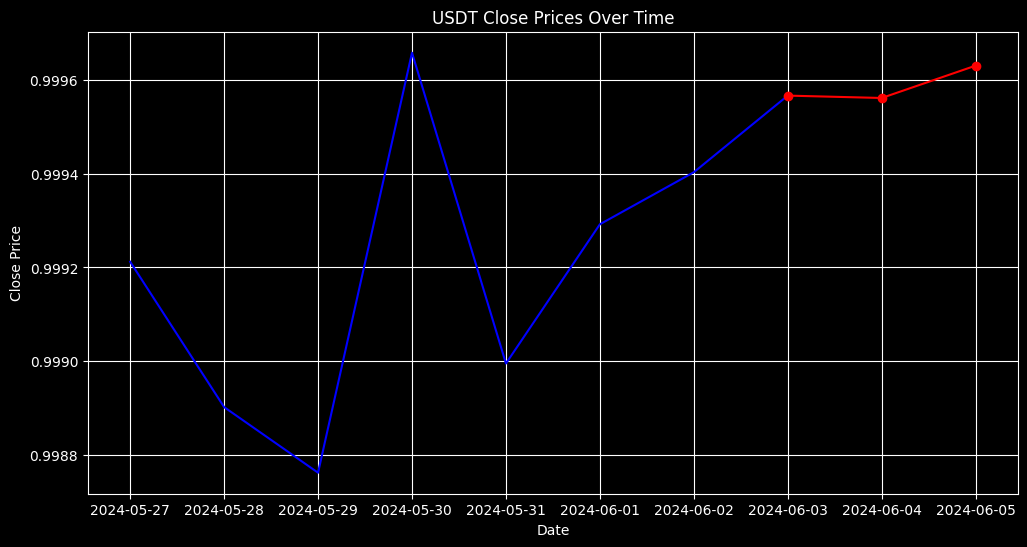

In [29]:
import pandas as pd
import pickle
import pandas_ta as ta
from datetime import timedelta
import matplotlib.pyplot as plt

def file(Type):
    if Type == 'usdt':
        df = pd.read_csv('usdt.csv', usecols=['Date', 'Close'])
        with open('usdt.pkl', 'rb') as f:
            model = pickle.load(f)
        df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
        for i in range(2):
            sma = ta.sma(df['Close'], length=5).iloc[-1]
            ema = ta.ema(df['Close'], length=5).iloc[-1]
            rsi = ta.rsi(df['Close'], length=14).iloc[-1]
            new_close = model.predict([[sma, ema, rsi]])
            new_date = df['Date'].iloc[-1] + timedelta(days=1)
            new_row = {
                "Date": new_date,
                "Close": new_close[0],  # Assuming the model returns an array
                "SMA": sma,
                "EMA": ema,
                "RSI": rsi
            }
            df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
        last_10_days = df.tail(10)
        print(last_10_days)
        
        # Plotting the graph
        plt.style.use('dark_background')
        plt.figure(figsize=(12, 6))
        # Plot all but the last two points
        plt.plot(last_10_days['Date'][:-2], last_10_days['Close'][:-2], linestyle='-', color='b')
        
        # Highlight the last two points
        plt.plot(last_10_days['Date'][-3:], last_10_days['Close'][-3:], linestyle='-', color='r', marker='o')
        plt.title('USDT Close Prices Over Time')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.grid(True)  
        plt.show()

# Call the function with 'usdt'
file('usdt')
